In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [3]:
house = pd.read_csv('Maison.csv')

In [4]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# changing column name

In [5]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [6]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


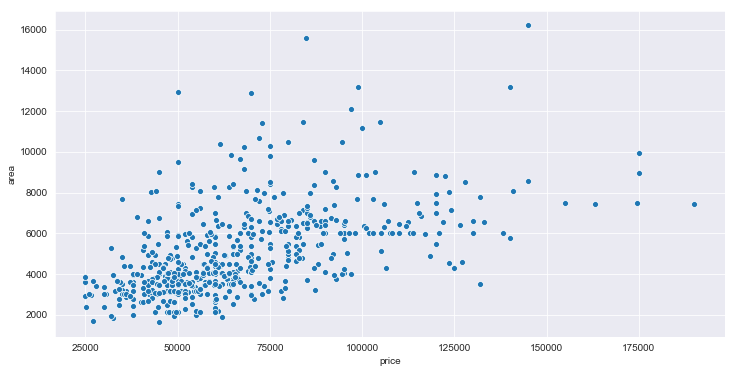

In [7]:
# checking for outliers in area vs price
sns.scatterplot(house['price'],house['area'])

In [8]:
house.describe()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [9]:
# Import the libraries for training data and linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
# We now instatiate a Linear Regression object
lm = LinearRegression()

In [11]:
x = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house['price']

In [12]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=101)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(382, 11)
(164, 11)
(382,)
(164,)


In [14]:
# Now let's build the model using sklearn
lm.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# first method

In [15]:
# Now let's look at the coefficients
print(lm.coef_)
# it would be nicer if we can put them together in a dataframe

[2.77427857e+00 4.78126011e+02 1.48552373e+04 6.30488890e+03
 1.10297552e+04 4.16165253e+03 1.00453729e+04 7.84525387e+03
 1.24304580e+04 2.11509966e+03 7.39519171e+03]


In [16]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
coef = pd.DataFrame(lm.coef_, x.columns, columns = ['Coefficients'])
coef

,Coefficients
area,2.774279
rooms,478.126011
bathroom,14855.237289
floors,6304.888896
driveway,11029.755230
game_room,4161.652525
cellar,10045.372895
gas,7845.253871
air,12430.457973
garage,2115.099660


# first method ends

# second method

In [44]:
import statsmodels.api as sm

In [45]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(x_test)

C:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [46]:
res = sm.OLS(y_test, X_endog)
res.fit()

In [47]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     29.45
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           2.53e-32
Time:                        09:05:40   Log-Likelihood:                -1795.1
No. Observations:                 164   AIC:                             3614.
Df Residuals:                     152   BIC:                             3651.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -703.0200   5457.714     -0.129      0.898   -1.15e+04    1.01e+04
area           2.7743      0.567      4.890      0.000       1.653       3.895
rooms        478.1260   1666.410      0.287      0.775   -2814.190    3770.442
bathroom    1.486e+04   2651.101      5.603      0.000    9617.474    2.01e+04
floors      6304.8889   1815.635      3.473      0.001    2717.749    9892.029
driveway    1.103e+04   3235.995      3.408      0.001    4636.420    1.74e+04
game_room   4161.6525   3287.342      1.266      0.207   -2333.129    1.07e+04
cellar      1.005e+04   2689.056      3.736      0.000    4732.622    1.54e+04
gas         7845.2539   6221.756      1.261      0.209   -4447.033    2.01e+04
air         1.243e+04   2704.379      4.596      0.000    7087.433    1.78e+04
garage      2115.0997   1396.503      1.515      0.132    -643.963    4874.163
situation   7395.1917   3006.773      2.460      0.015    1454.729    1.33e+04
==============================================================================
Omnibus:                       17.037   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.373
Skew:                           0.535   Prob(JB):                     6.90e-07
Kurtosis:                       4.734   Cond. No.                     3.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
y_test

225     70800
18      45000
48      48000
355     75000
350     64500
365     99000
39      54500
398     82900
312     70000
171     32000
288     30000
8       83800
432     69000
313     75000
100     57000
178     74500
452     73000
83      43000
385     78900
261     46200
114     75000
117     94500
81      35000
118    106500
246     38000
267     52500
470     60000
291     39000
372    100500
55      25000
        ...  
111     46500
205     60000
516     95000
534     82000
379     97000
127    122500
38      82000
389     86000
406     87000
360    130000
91      58000
501     68500
209     92500
390     86900
57      56000
216    138300
526    105000
283     45000
468     55000
69      70000
520    103000
266     52500
336    106000
70      45000
308     70000
401     76000
189     57250
43      92000
36      61700
405     86000
Name: price, Length: 164, dtype: int64

In [49]:
pridictions = lm.predict(x_test)

In [50]:
pridictions

array([ 75410.5209142 ,  41536.24848189,  48739.8097211 ,  70920.59745464,
        60275.62615329,  89069.31699967,  55052.94587432,  74011.95335583,
        70024.79491048,  35146.58128577,  43879.78908114,  60444.80199665,
        61303.27303151,  73080.38176076,  78011.69482759,  67133.77079351,
        79715.36129449,  52444.99021924,  73665.97870424,  59848.00123438,
        74103.97623161,  89769.41043134,  36678.77294748,  78171.23602963,
        44212.70250983,  42430.51627874,  60992.13612407,  52438.34227452,
       102564.6412398 ,  42486.00185019,  56033.61369097,  95212.41709927,
        43540.22770772,  61124.29831061,  70625.49798496,  87507.4981719 ,
        50224.31868263,  36852.12224077, 108892.5239617 ,  73218.75015923,
        62291.40600593,  50087.52513871,  42487.72832059,  50926.45665518,
        51564.39143578,  77445.41084095,  86824.39705125,  81353.2737094 ,
        46314.74094672,  45509.38999075,  67445.14150801,  48963.84611422,
        41410.53186059, 1

In [51]:
pridictions.shape

(164,)

## Coverting into dataframe (Trained Vs Predicted values)

In [60]:

Pred_vs_train_df = pd.DataFrame(list(zip(y_test,pridictions)),columns=['Trained_values','Predicted_values'])

## Converting dataframe into CSV file

In [63]:
Pred_vs_train_df.to_csv('Trained_vs_Predicted_values.csv')